<a href="https://colab.research.google.com/github/touhidDS/Linear_Regration/blob/main/Multiple_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/Student_Performance.csv')
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


## EDA & Ploting

In [ ]:
#Converted categorical values ​​to numeric values
df['Extracurricular Activities']=df['Extracurricular Activities'].map({'Yes':1,'No':0})
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
5,3,78,0,9,6,61.0
6,7,73,1,5,6,63.0
7,8,45,1,4,6,42.0
8,5,77,0,8,2,61.0
9,4,89,0,4,0,69.0


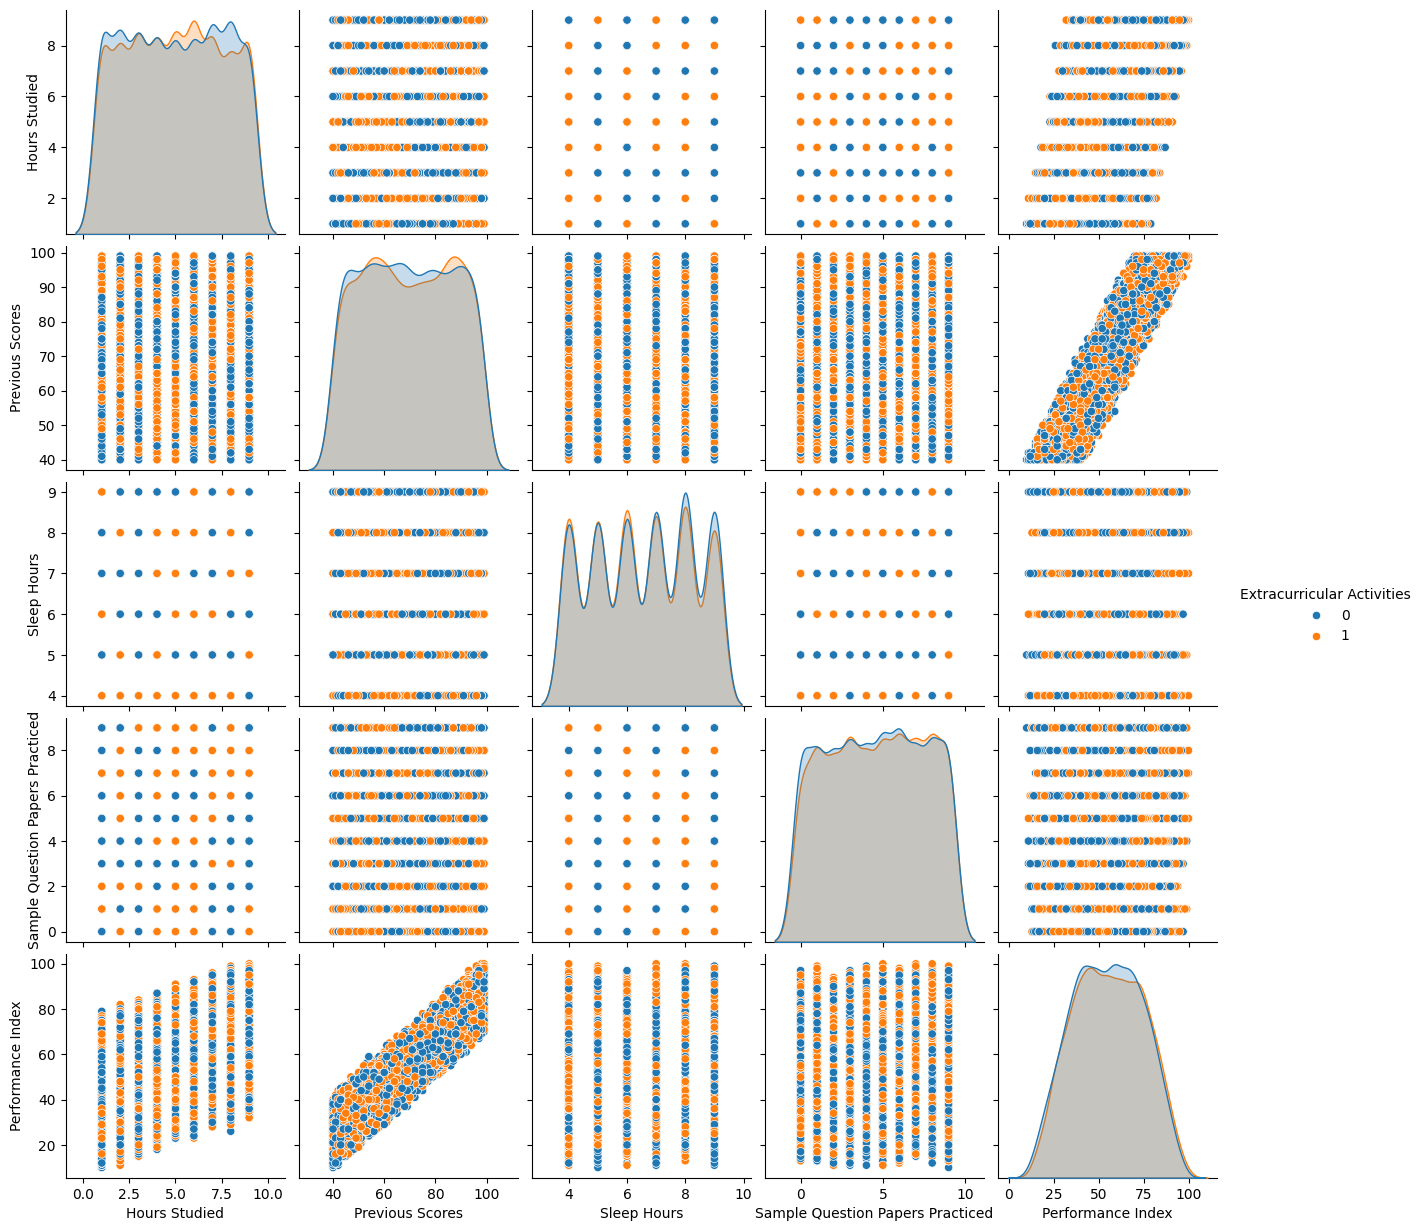

In [ ]:
sns.pairplot(df,hue='Extracurricular Activities')
plt.show()

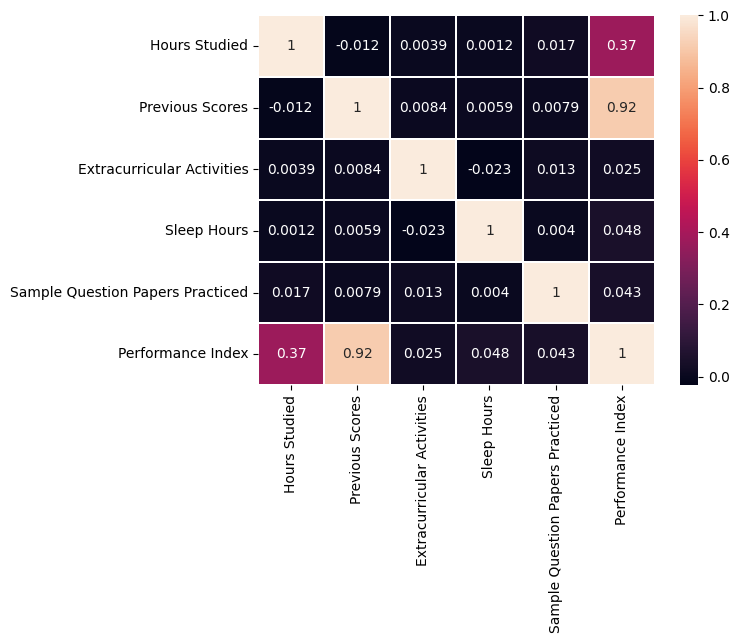

In [ ]:
numeric_col=df.select_dtypes(include='number')
sns.heatmap(numeric_col.corr(),annot=True,linewidths=0.2)
plt.show()

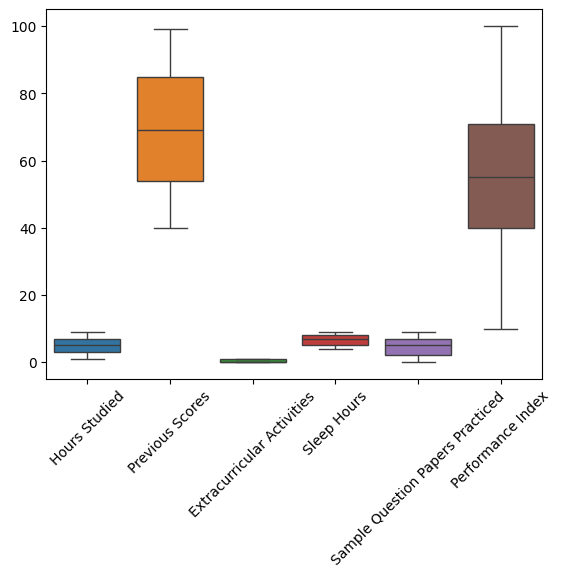

In [ ]:
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

## Split dataset

In [ ]:
x=df.drop(columns=['Performance Index'])
y=df['Performance Index']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(8000, 5) (2000, 5) (8000,) (2000,)


## Train the model

In [ ]:
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

## Result

In [ ]:
y_pred=reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Coefficient: ',reg.coef_)
print('Interception: ',reg.intercept_)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2*100)

Coefficient:  [2.85149003 1.01922686 0.63725848 0.48822461 0.18803371]
Interception:  -34.14770884019596
Mean Squared Error: 4.028187324611812
R-squared Score: 98.90184172190958


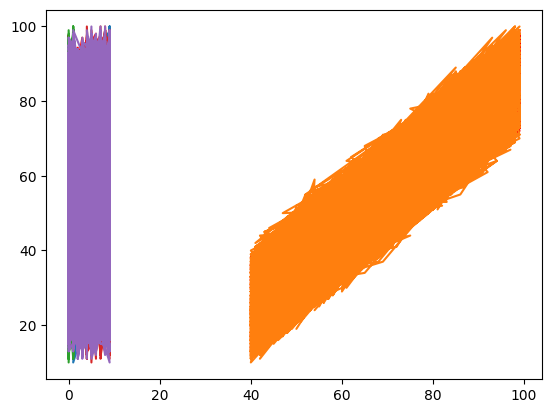

In [ ]:
plt.plot(x_train,reg.predict(x_train),color='r')
plt.plot(x,y)